<a href="https://www.kaggle.com/code/oakthyago/photovoltaic-analysis-from-full-of-shadows-system?scriptVersionId=109982518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction
This dataset was get from a client photovoltaic system.  Bellow is a photo of the system espesification. This particular client has a lot obcjects applying shadows on the photovolcaic modules and is a very particular case to be analised.



![a](https://i.postimg.cc/8cz5xZny/paulino.png)

In [2]:
df = pd.read_csv("../input/solarenergynortheastbrazil/2_Paulino_newdata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26757 entries, 0 to 26756
Data columns (total 48 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           26757 non-null  int64  
 1   Device Type                          26757 non-null  object 
 2   SN                                   26757 non-null  object 
 3   Parent Device                        26757 non-null  int64  
 4   Time                                 26757 non-null  object 
 5   Hardware Version                     26757 non-null  object 
 6   Master Software Version              26757 non-null  object 
 7   Vice Software Version                26757 non-null  object 
 8   Standard Main Version                26757 non-null  int64  
 9   Communication CPU Software Version   26757 non-null  object 
 10  DC Voltage PV1(V)                    26757 non-null  float64
 11  DC Voltage PV2(V)           

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,Device Type,SN,Parent Device,Time,Hardware Version,Master Software Version,Vice Software Version,Standard Main Version,Communication CPU Software Version,DC Voltage PV1(V),DC Voltage PV2(V),DC Current PV1(A),DC Current PV2(A),DC Power PV1(W),DC Power PV2(W),Total Power Generation(W),AC Voltage R/U/A(V),AC Current R/U/A(A),AC Output Frequency R(Hz),Total AC Output Power(W),Cumulative Production (Active)(kWh),Daily Production (Active)(kWh),Dc Component- Phase R Current(mA),Total Reactive Power(W),Ppc Ac Current R(A),Ppc Ac Power R(W),Grid Status,Total Grid Power(W),Leak Current(mA),Insulation Impedance 1(KΩ),Combiner Voltage-Group 1(V),String Current- Group 1 Line 1(A),String Current- Group 1 Line 2(A),Combiner Voltage-Group 2(V),String Current- Group 2 Line 1(A),String Current- Group 2 Line 2(A),Total Consumption Power(W),Single Plate Ambient Temperature(℃),Radiator Temperature 1(℃),System Time,Generation Time Today(Min),Generation Time Total(Min),Total Running Hour(h),Boot Countdown,Bus Voltage(V),Inverter status,Slave Address
0,0,Inverter,SH3ES250MB8301,2309721222,2022/05/07 05:16:58,V001,V000000,V000000,0,V030001,0.0,0.0,0.00,0.00,0.0,0.0,0,0.0,0.00,0.00,0.0,116.8,0.0,0,0.0,0.00,0.0,Static,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2022-05-07 05:16:31,0,5943,101.27,0,0.0,Waiting,NaN
1,1,Inverter,SH3ES250MB8301,2309721222,2022/05/07 05:22:04,V200,V030006,V030001,601,V030001,152.6,152.6,0.41,0.57,60.0,80.0,140,218.8,0.07,60.02,0.0,116.8,0.0,0,0.0,0.41,0.0,Static,0.0,2,0,152.7,0.0,0.0,152.6,0.0,0.0,0.0,36,25,2022-05-07 05:21:44,0,5943,101.35,201,151.2,Waiting,NaN
2,2,Inverter,SH3ES250MB8301,2309721222,2022/05/07 05:27:08,V200,V030006,V030001,601,V030001,160.2,160.2,0.42,0.56,60.0,90.0,150,222.8,0.08,59.98,0.0,116.8,0.0,0,0.0,0.41,0.0,Static,0.0,3,0,160.2,0.0,0.0,160.2,0.0,0.0,0.0,37,25,2022-05-07 05:26:53,0,5943,101.43,213,158.7,Waiting,NaN
3,3,Inverter,SH3ES250MB8301,2309721222,2022/05/07 05:32:13,V200,V030006,V030001,601,V030001,132.2,136.3,0.10,0.14,10.0,10.0,20,218.6,0.56,59.96,20.0,116.8,0.0,-1,0.0,0.39,0.0,Static,0.0,5,787,136.2,0.0,0.0,132.2,0.0,0.0,0.0,37,25,2022-05-07 05:32:04,1,5944,101.53,180,349.9,Grid connected,NaN
4,4,Inverter,SH3ES250MB8301,2309721222,2022/05/07 05:37:19,V200,V030006,V030001,601,V030001,144.2,140.3,0.30,0.33,40.0,40.0,80,224.7,0.20,59.96,30.0,116.8,0.0,-1,0.0,0.38,0.0,Static,0.0,8,787,144.2,0.0,0.0,140.3,0.0,0.0,0.0,38,26,2022-05-07 05:37:13,6,5949,101.62,180,358.8,Grid connected,NaN


<AxesSubplot:>

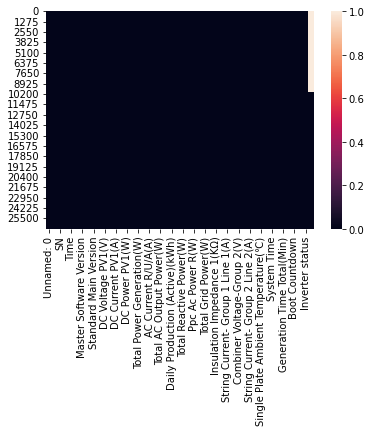

In [5]:
#to see if the dataset has some null values
sns.heatmap(df.isnull())


In [6]:
#sns.pairplot(df)

In [7]:
df['Date'] = df['Time'].apply(lambda x: x.split(' ')[0])
df['Hour'] = df['Time'].apply(lambda x: x.split(' ')[1])

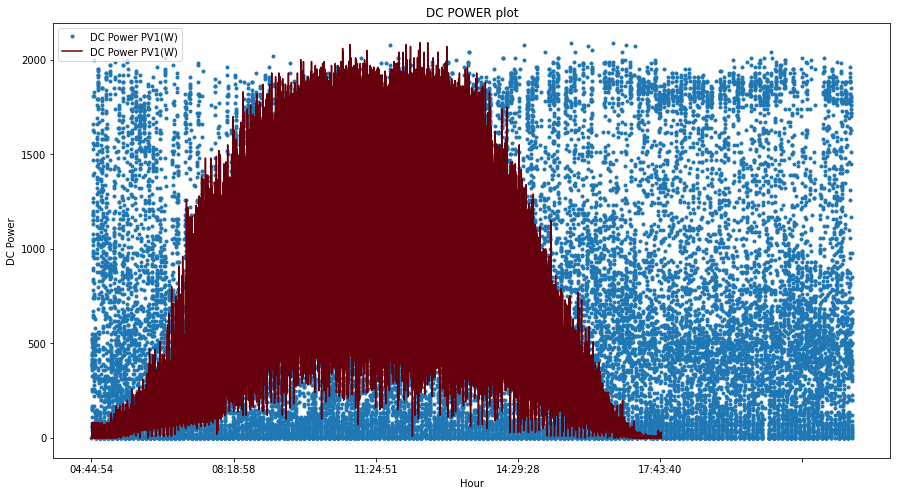

In [8]:
#plant1_data.iplot(x= 'time', y='DC_POWER', xTitle='Time',  yTitle= 'DC Power', title='DC POWER plot')
df.plot(x= 'Hour', y='DC Power PV1(W)', style='.', figsize = (15, 8))
df.groupby('Hour')['DC Power PV1(W)'].agg('mean').plot(legend=True, colormap='Reds_r')
plt.ylabel('DC Power')
plt.title('DC POWER plot')
plt.show()

In [9]:
calendar_dc = df.pivot_table(values='DC Power PV1(W)', index='Time', columns='Date')